<a href="https://colab.research.google.com/github/alviskagan/CNN-MNIST/blob/master/CNN_ModelTraining_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import essentials
import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt

%matplotlib inline

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

# Preprocessing

**Eksplorasi Data**

Memuat datatest fashion MNIST.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# (train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()
train_data = pd.read_csv('/content/drive/My Drive/Digitalent 2019/Project Akhir/fashion-mnist_train (1).csv')
test_data = pd.read_csv('/content/drive/My Drive/Digitalent 2019/Project Akhir/fashion-mnist_test (1).csv')

In [0]:
# print("Training set X (images) shape :{shape}".format(shape=train_X.shape))
# print("Test set X (images) shape :{shape}".format(shape=test_X.shape) )
# print("Training set Y (images) shape :{shape}".format(shape=train_Y.shape))
# print("Test set Y (images) shape :{shape}".format(shape=test_Y.shape) )
train_data.shape, test_data.shape


((60000, 785), (10000, 785))

In [0]:
# Create dictionary of target classes
objects = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneake',
 8: 'Bag',
 9: 'Ankle Boot',
}

**Melihat Data**

Menampilkan sample dari isi dataset.


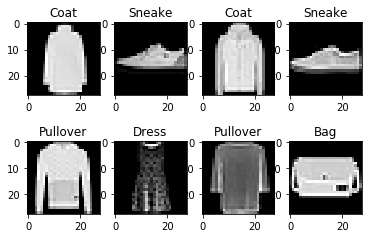

In [0]:
# let's have a quick look of those images
f, axes = plt.subplots(2, 4)
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = np.array(train_data.iloc[index, 1:]).reshape((28, 28))
        obj = train_data.iloc[index, 0]
        axe.imshow(img, cmap='gray')
        axe.set_title(objects[obj])

In [0]:
# separate the training data into images and labels
images = train_data.iloc[:, 1:]
labels = train_data.iloc[:, 0]

In [0]:
# reshape the images to fit CNNs
labels = labels.as_matrix()
images = images.as_matrix().reshape(images.shape[0], 1, 28, 28)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
# one-hot encoding for labels
labels = np_utils.to_categorical(labels)

In [0]:
# divide data into training and validation set
train_features, vali_features, train_labels, vali_labels = train_test_split(images, labels, 
                                                                           test_size=0.15, random_state=200)

In [0]:
# check data shapes
print('train_features shape: ', train_features.shape)
print('vali_features shape: ', vali_features.shape)
print('train_labels shape: ', train_labels.shape)
print('vali_labels shape: ', vali_labels.shape)

train_features shape:  (51000, 1, 28, 28)
vali_features shape:  (9000, 1, 28, 28)
train_labels shape:  (51000, 10)
vali_labels shape:  (9000, 10)


In [0]:
# hyperparameters
epochs = 30
batch_size = 256

# build model
n_classes = 10
model = Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))

# normalization
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu',
          bias_initializer='RandomNormal', kernel_initializer='random_uniform'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.35))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.35))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

W0817 08:14:50.617940 140052114003840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 08:14:50.657238 140052114003840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 08:14:50.677584 140052114003840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0817 08:14:50.678407 140052114003840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0817 08:14:50.679181 1400521

In [0]:
opt = Adam(decay=0.001)
# compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0817 08:15:25.005641 140052114003840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 8, 8)         819712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 512, 4, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
__________

In [0]:
# training
import time
start_time = time.time()

training = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)
training_time = time.time() - start_time

W0817 08:15:28.083594 140052114003840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 51000 samples, validate on 9000 samples
Epoch 1/30
51000/51000 [==============================] - 9s 183us/step - loss: 0.7708 - acc: 0.7251 - val_loss: 0.3977 - val_acc: 0.8523
Epoch 2/30
51000/51000 [==============================] - 5s 93us/step - loss: 0.4507 - acc: 0.8460 - val_loss: 0.3249 - val_acc: 0.8848
Epoch 3/30
51000/51000 [==============================] - 5s 93us/step - loss: 0.3648 - acc: 0.8753 - val_loss: 0.2853 - val_acc: 0.8953
Epoch 4/30
51000/51000 [==============================] - 5s 93us/step - loss: 0.3196 - acc: 0.8907 - val_loss: 0.2596 - val_acc: 0.9079
Epoch 5/30
51000/51000 [==============================] - 5s 93us/step - loss: 0.2846 - acc: 0.9026 - val_loss: 0.2530 - val_acc: 0.9082
Epoch 6/30
51000/51000 [==============================] - 5s 93us/step - loss: 0.2640 - acc: 0.9098 - val_loss: 0.2394 - val_acc: 0.9158
Epoch 7/30
51000/51000 [==============================] - 5s 94us/step - loss: 0.2419 - acc: 0.9174 - val_loss: 0.2272 - val_acc

Training 30 epochs in 2:29.6


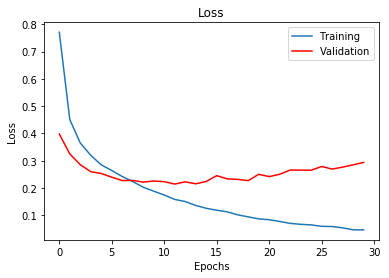

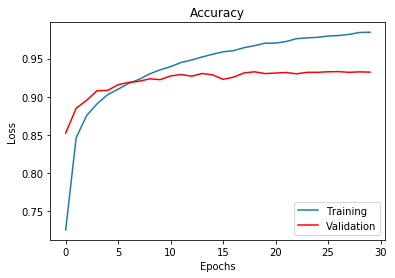

In [0]:
mm = training_time // 60
ss = training_time % 60
print('Training {} epochs in {}:{}'.format(epochs, int(mm), round(ss, 1)))

# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

# Menyimpan Model Deep Learning

In [0]:
model.save('model-alvis-v2.h5')

In [0]:
from keras.utils import plot_model

plot_model(model, 'model-alvisv2.png', show_shapes=True)